# Spatial Data Science Workshop
## Cristina KADAR & Benjamin RYDER
## 20th September 2017

**Goal:** Familiarize participants with the challenges of working with geo-referenced multi-modal data (governmental data, open data, online digital traces, etc.).

**Problem:** How are Airnbnb prices influenced by the listing properties and the attributes of the neighborhood?

**Data:** We will make the data available for download on the tutorial’s website.

**Software:**

--code: python (pysal, stats, maybe scikit-learn) and Jupiter Notebook.

--visualization: QGIS or cartoDB.

Participants will be required to have the packages/tools pre-installed. We will send the final requirements as soon as we know them.

## Part one 

Import the data

Visualise the data

Test assumptions

In [171]:
%matplotlib inline

from Resources import helpers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd
from pysal.contrib.viz import mapping as maps
# need palettable: pip install palettable
from pylab import *
from pylab import figure, scatter, show
import sys
import platform

params = {'legend.fontsize': 20}
plt.rcParams.update(params)
tfs = 25

def plotNeighborGraph(title, grouping):
    f, ax = plt.subplots(1, figsize=(20, 20))
    tx.plot(ax=ax, linewidth=0.5,color='white')
    plt.plot(centroids[:,0], centroids[:,1],'.')
    for k,neighs in grouping.neighbors.items():
        origin = centroids[k]
        for neigh in neighs:
            segment = centroids[[k,neigh]]
            plt.plot(segment[:,0], segment[:,1], '-')
    plt.title(title, fontsize=tfs)
    ax.set_axis_off()
    show()
    

print(sys.version_info)
print("Python Version: " + str(platform.python_version()))

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
Python Version: 3.5.2


In [ ]:
shp_link = "./Data/nyc_census_tract_features_v3_export.shp"
tx = gpd.read_file(shp_link)
#tx.columns.tolist()

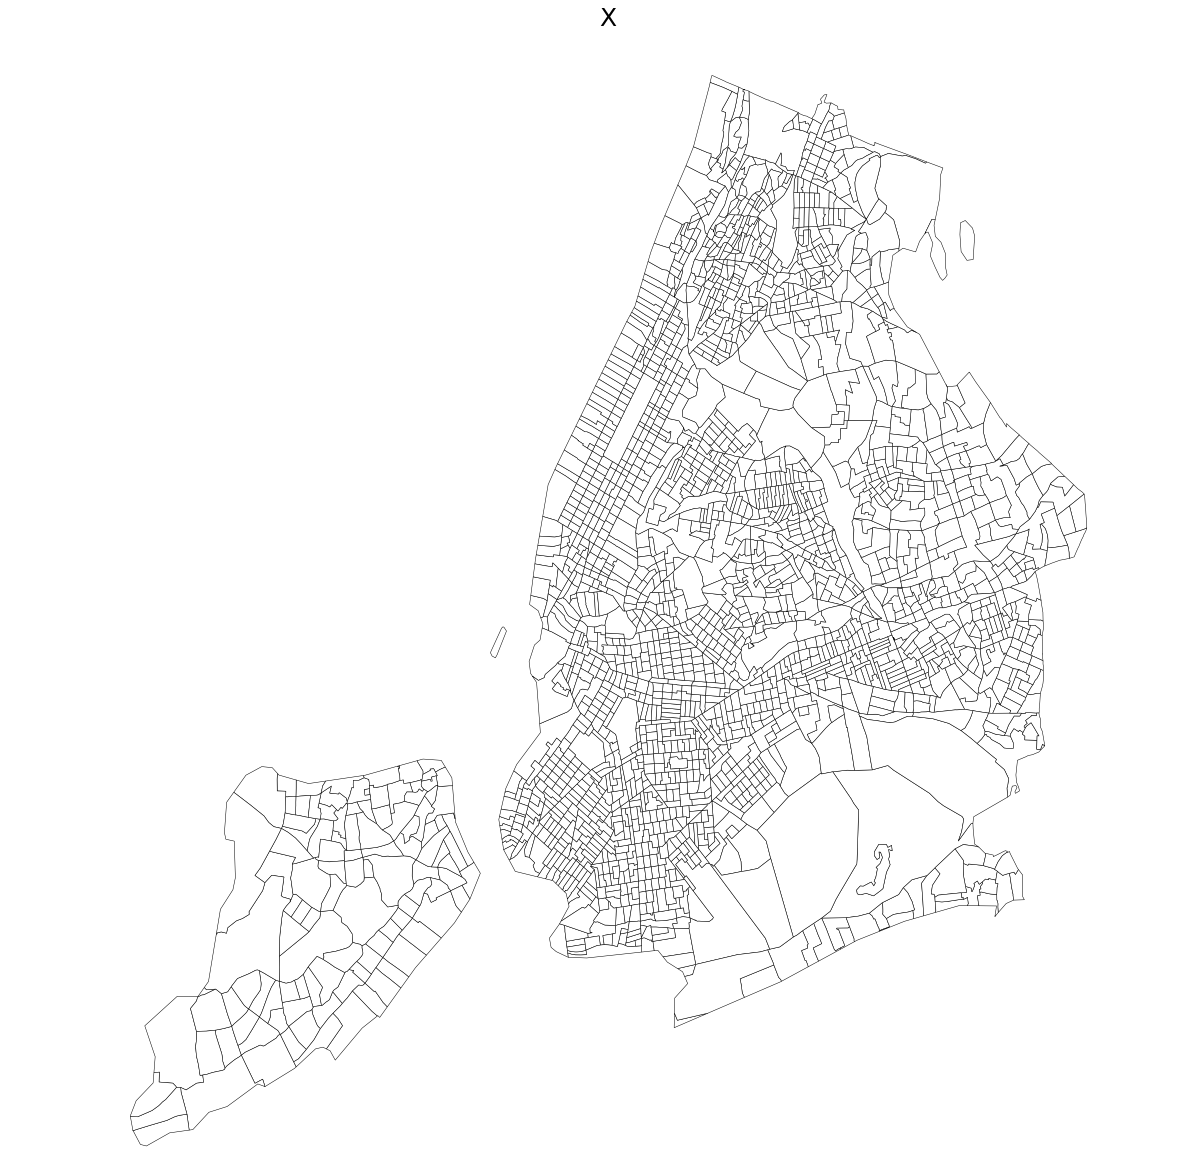

In [125]:
f, ax = plt.subplots(1, figsize=(20, 20))
tx.plot(ax=ax, linewidth=0.5, color='white')
plt.title('X', fontsize=tfs)
ax.set_axis_off()
plt.show()

In [110]:
dataframe = ps.pdio.read_files(shp_link)

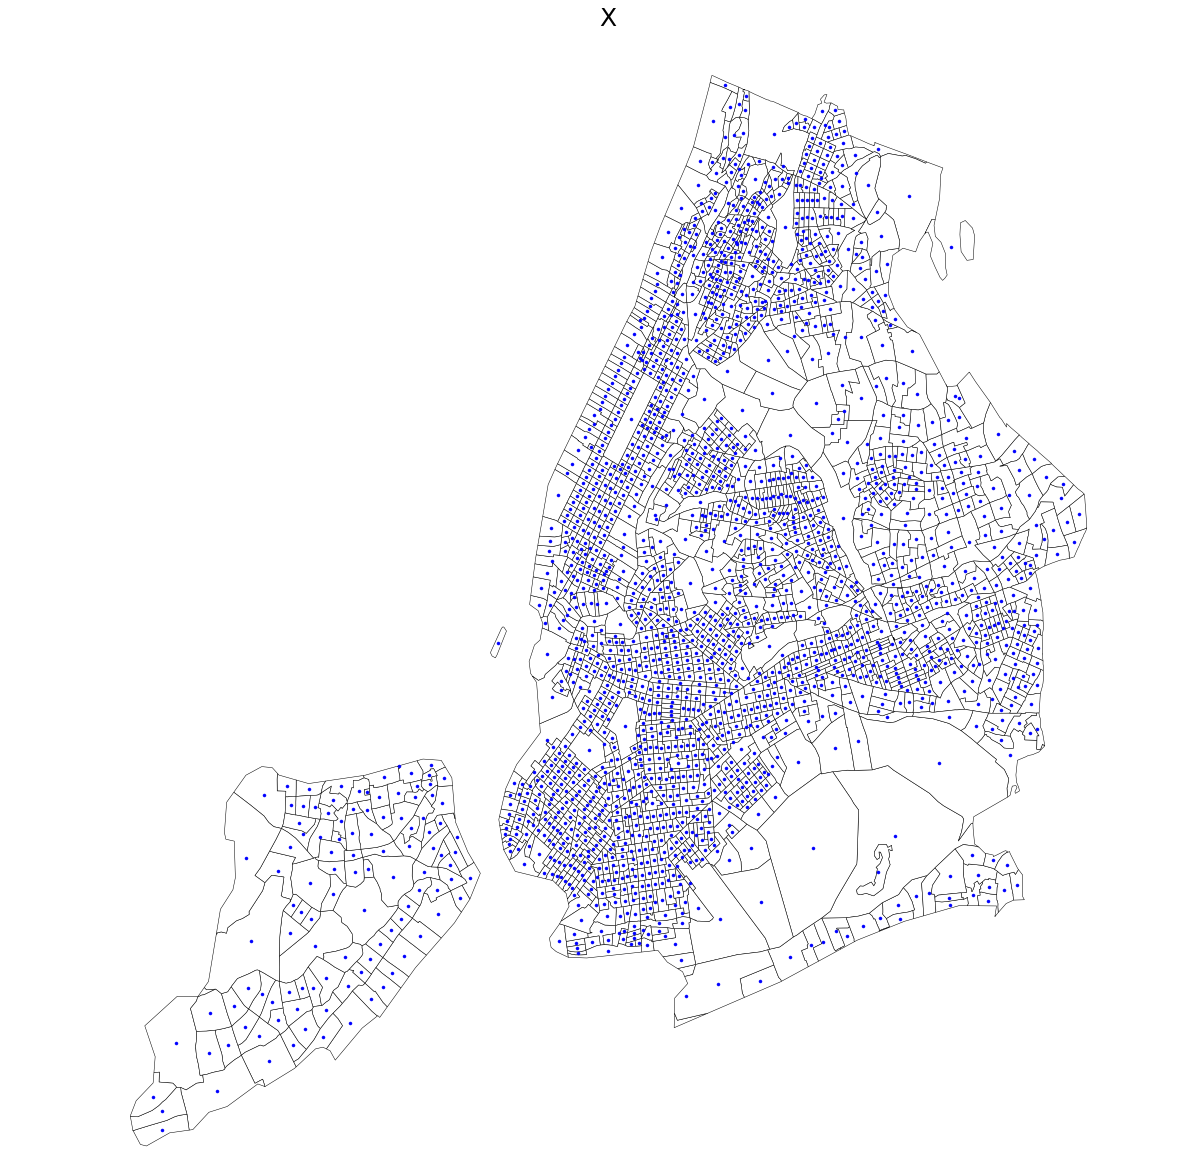

In [127]:
centroids = np.array([list(poly.centroid) for poly in dataframe.geometry])

f, ax = plt.subplots(1, figsize=(20, 20))
tx.plot(ax=ax, linewidth=0.5,color='white')
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.title('X', fontsize=tfs)
ax.set_axis_off()
plt.show()

In [173]:
knn = ps.knnW_from_shapefile(shp_link, k=4)
#knn.neighbors

In [119]:
self_and_neighbors = [4]
self_and_neighbors.extend(knn.neighbors[4])
print(self_and_neighbors)
dataframe.loc[self_and_neighbors]

[4, 1723, 1255, 809, 594]


geom_id    id  county  tract  \
4        3290  3644      81  12000   
1723      694  3633      81  10800   
1255      696  3642      81  11800   
809      3291  3646      81  12200   
594       701  3668      81  14800   

                                               geom_gps  locations_  \
4     SRID=4326;MULTIPOLYGON(((-73.828874 40.693828,...          48   
1723  SRID=4326;MULTIPOLYGON(((-73.82753 40.687239,-...          41   
1255  SRID=4326;MULTIPOLYGON(((-73.833558 40.687804,...          55   
809   SRID=4326;MULTIPOLYGON(((-73.828008 40.694067,...          58   
594   SRID=4326;MULTIPOLYGON(((-73.825103 40.692968,...          70   

      incidents_  incident_1  larcenies_  robberies_  \
4            492         231          49          59   
1723         470         227          48          63   
1255         420         182          41          46   
809         1210         540         155          98   
594          416         175          40          42   

                           ...                         mta_we_mor  mta_week_m  \
4                          ...                                                  
1723                       ...                                                  
1255                       ...                                                  
809                        ...                                                  
594                        ...                                                  

      max_qscore  min_qscore  avg_qscore  count_list  max_listin  min_listin  \
4      37.715652   19.538616   27.527561           1          33          33   
1723   37.528179    9.603817   27.502995           1          33          33   
1255   34.552700   15.709024   26.039561           1         140         140   
809    36.731960   17.114878   27.195575           2          65          50   
594    35.468761   16.216555   25.681386           4          95          45   

      avg_listin                                         geometry  
4           33.0  <pysal.cg.shapes.Polygon object at 0x120fd4e48>  
1723        33.0  <pysal.cg.shapes.Polygon object at 0x14a2b2ef0>  
1255       140.0  <pysal.cg.shapes.Polygon object at 0x12260e710>  
809         57.5  <pysal.cg.shapes.Polygon object at 0x1218fa358>  
594         64.0  <pysal.cg.shapes.Polygon object at 0x122620ba8>  

[5 rows x 188 columns]

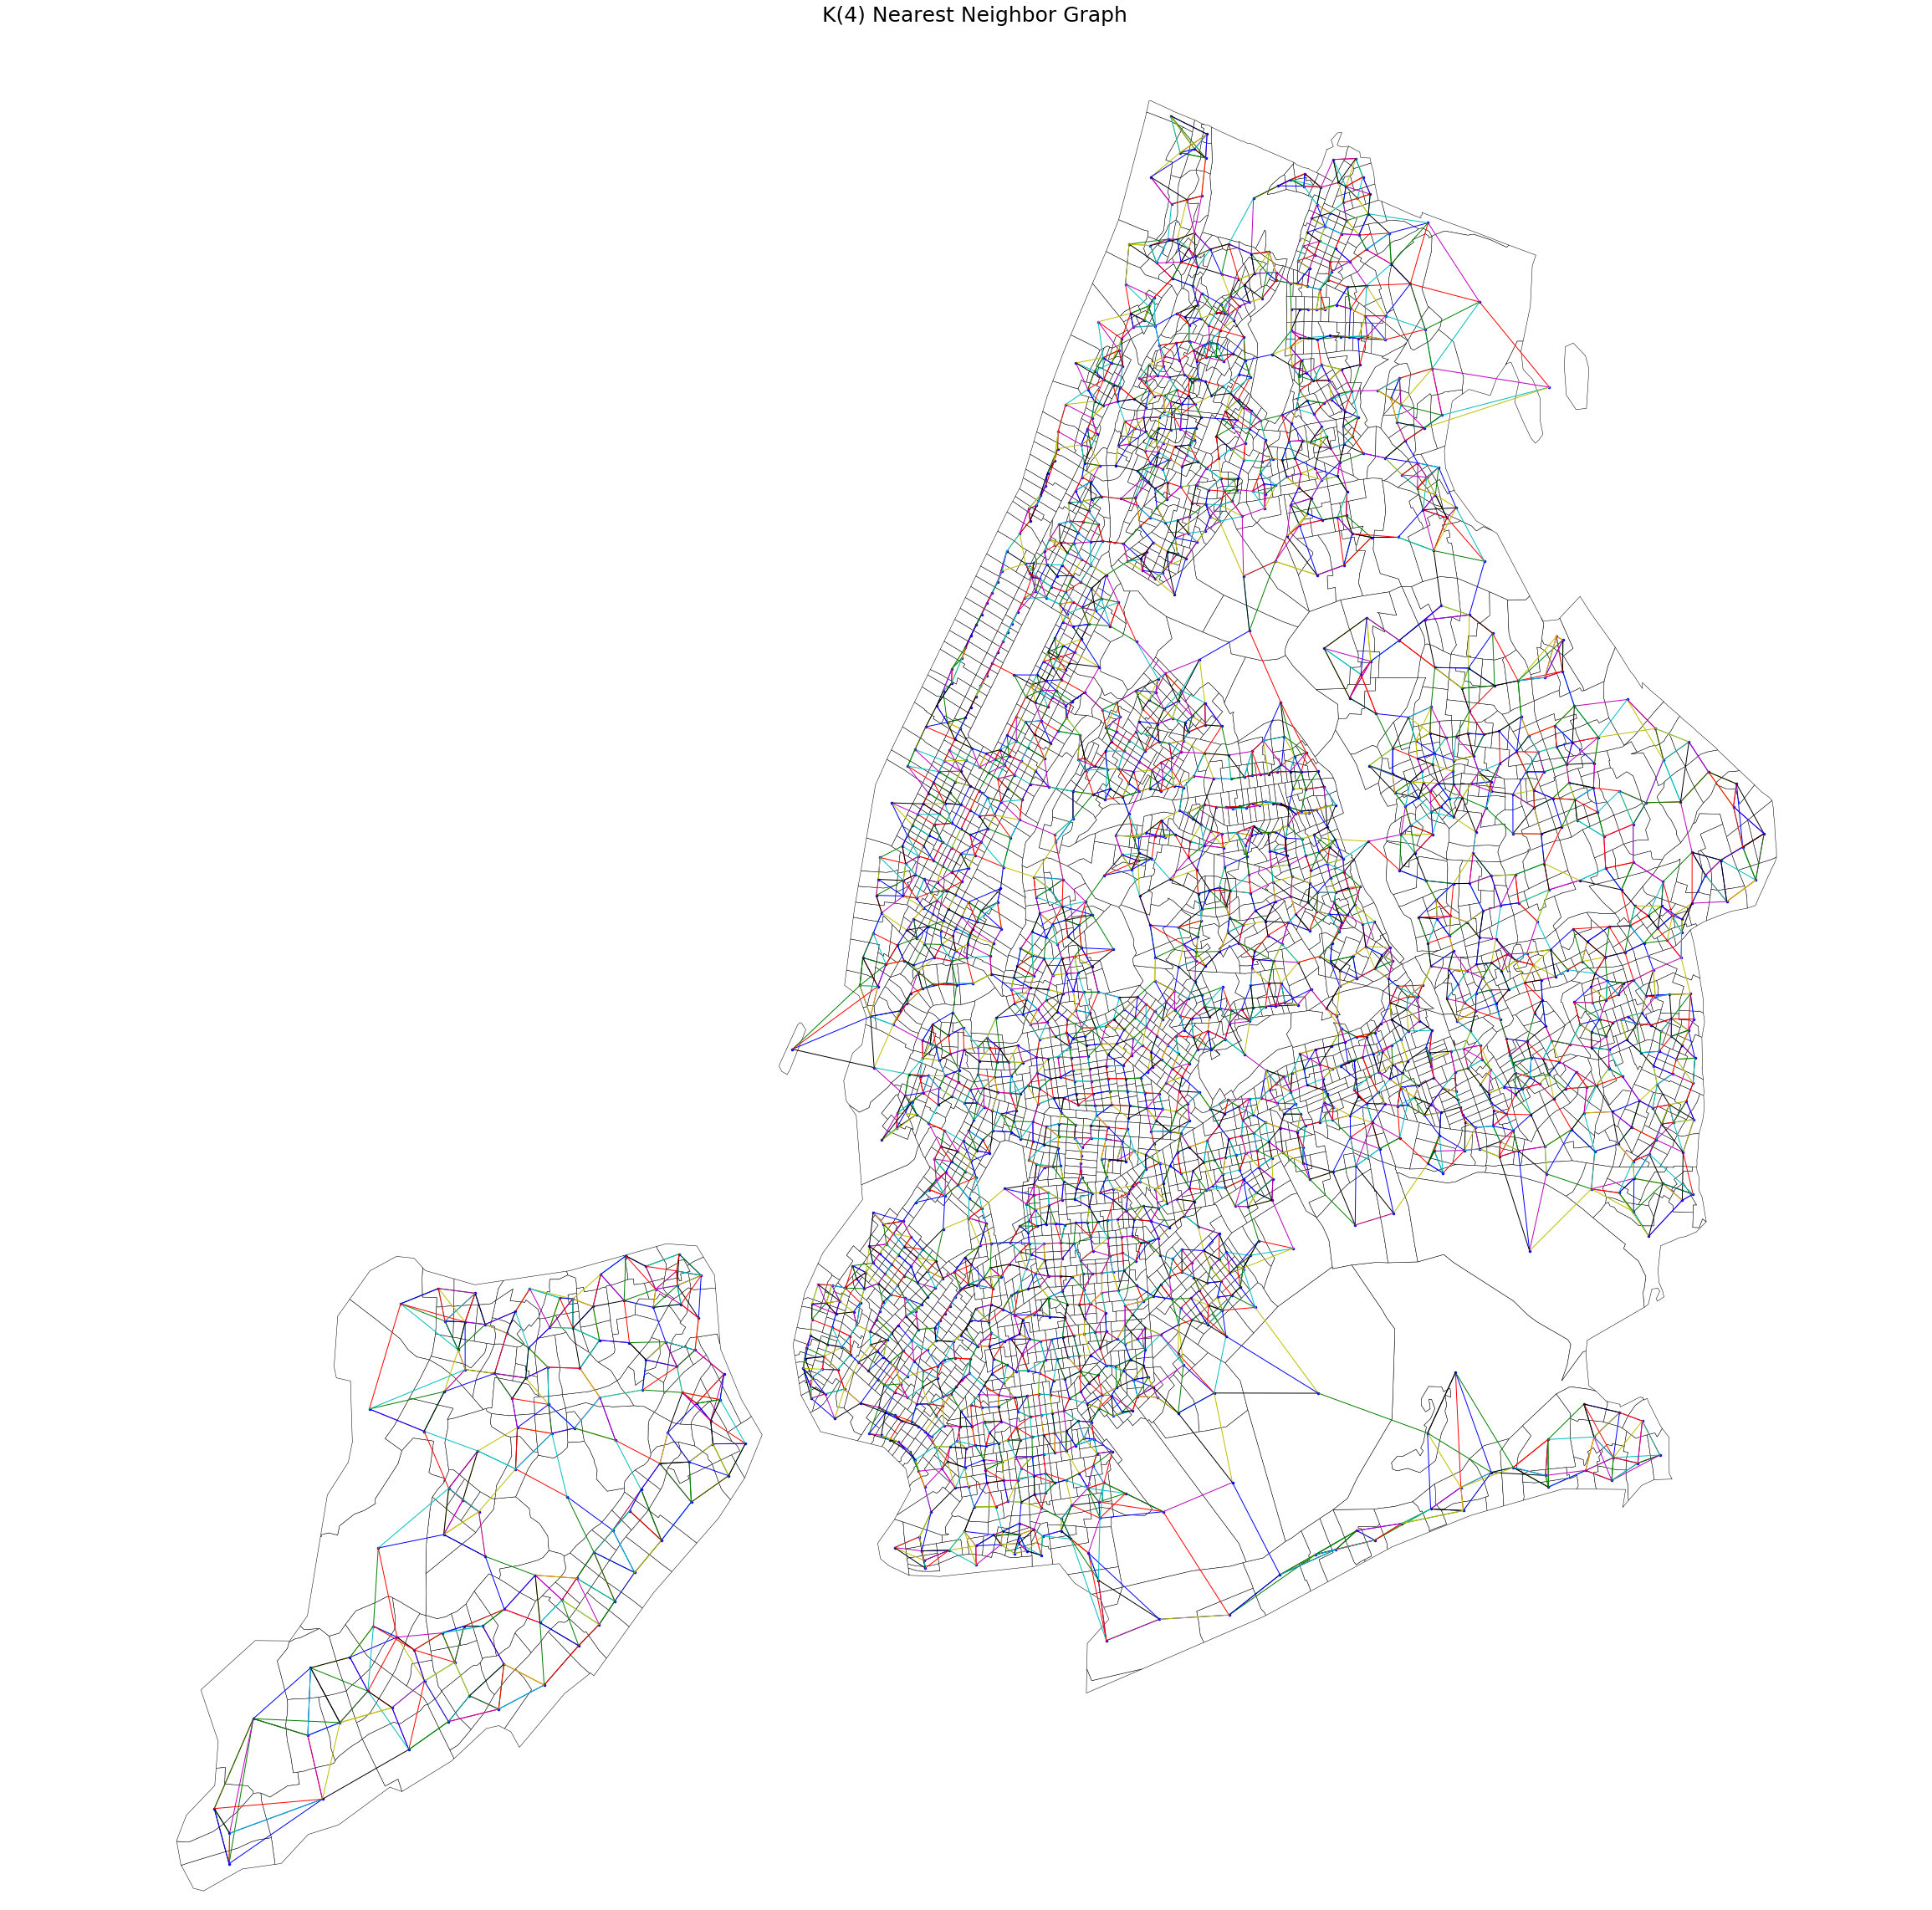

In [169]:
plotNeighborGraph('K(4) Nearest Neighbor Graph', knn)

/Users/bryder/anaconda/lib/python3.5/site-packages/pysal/weights/weights.py:186: UserWarning: There is one disconnected observation (no neighbors)
  warnings.warn("There is one disconnected observation (no neighbors)")
/Users/bryder/anaconda/lib/python3.5/site-packages/pysal/weights/weights.py:187: UserWarning: Island id: 241
  warnings.warn("Island id: %s" % str(self.islands[0]))


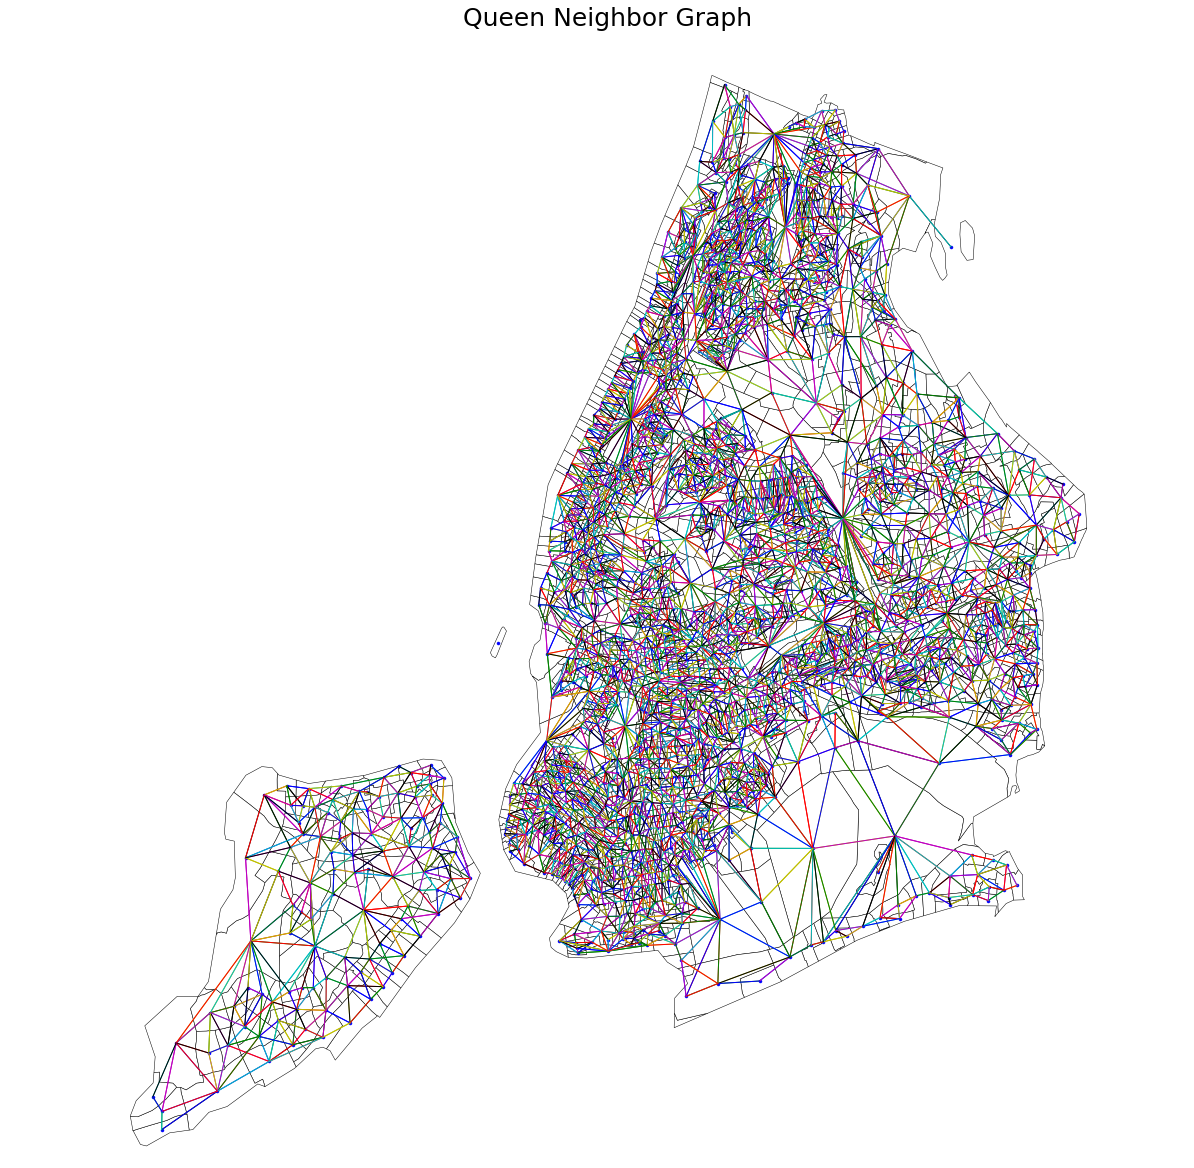

In [172]:
qW = ps.queen_from_shapefile(shp_link)
plotNeighborGraph('Queen Neighbor Graph', qW)
#qW.transform = 'r'
#qW.sparse

In [ ]:
rW = ps.rook_from_shapefile(shp_link)
plotNeighborGraph('Rook Neighbor Graph', rW)
#rW.transform = 'r'

/Users/bryder/anaconda/lib/python3.5/site-packages/pysal/weights/weights.py:186: UserWarning: There is one disconnected observation (no neighbors)
  warnings.warn("There is one disconnected observation (no neighbors)")
/Users/bryder/anaconda/lib/python3.5/site-packages/pysal/weights/weights.py:187: UserWarning: Island id: 241
  warnings.warn("Island id: %s" % str(self.islands[0]))


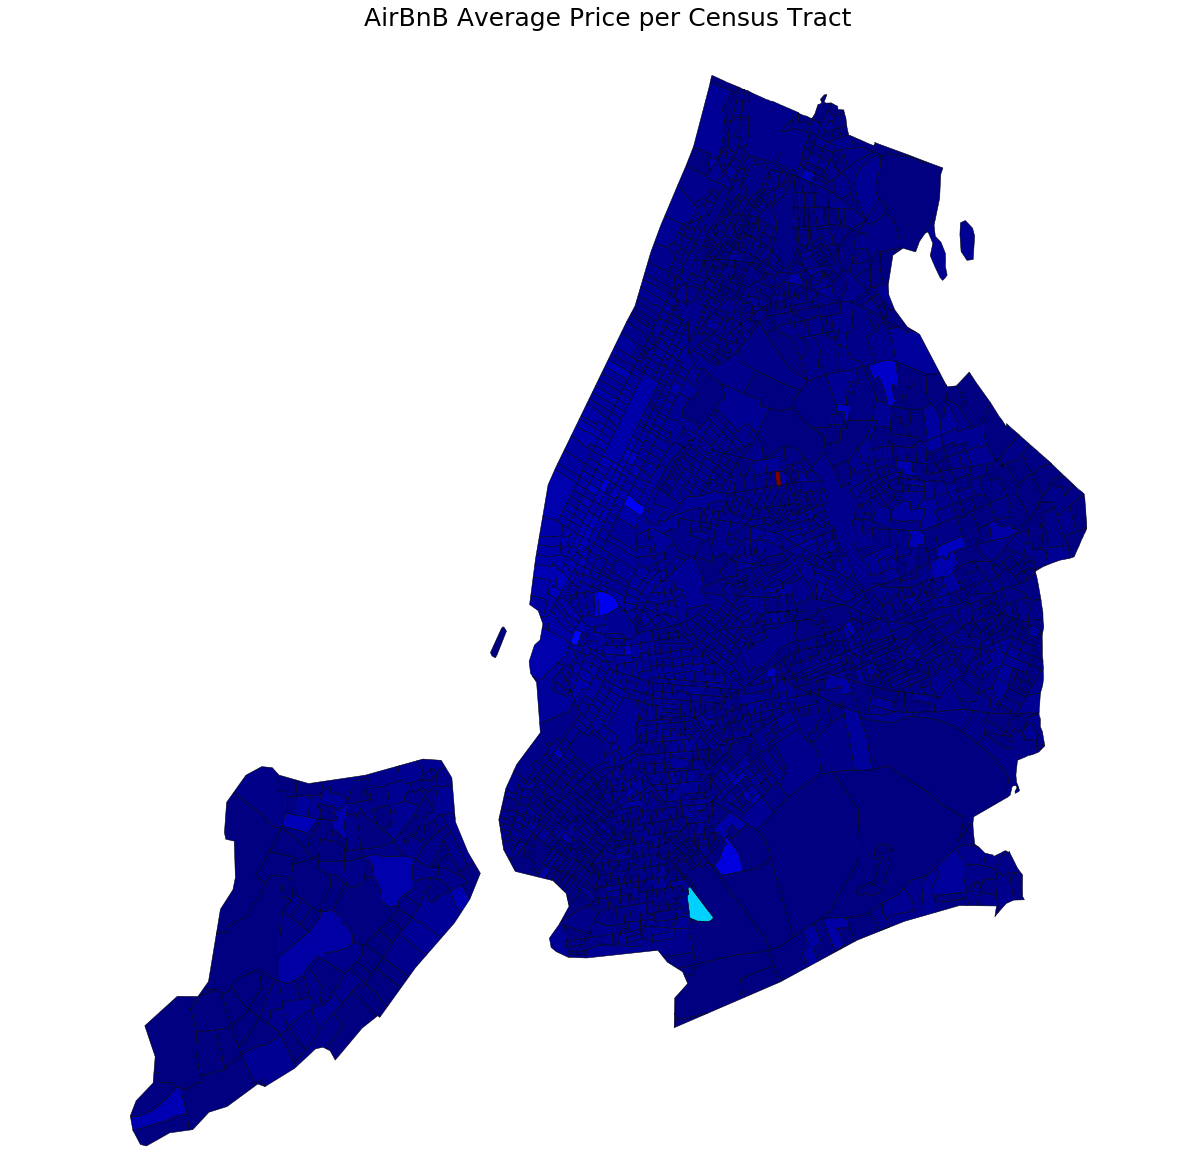

In [159]:
f, ax = plt.subplots(1, figsize=(20, 20))
tx.plot(ax=ax, linewidth=0.5, column='avg_listin')
plt.title('AirBnB Average Price per Census Tract', fontsize=tfs)
ax.set_axis_off()
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x11c683320>],
 'caps': [<matplotlib.lines.Line2D at 0x11c6abd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c687eb8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c6876a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c683cc0>,
  <matplotlib.lines.Line2D at 0x11c683dd8>]}

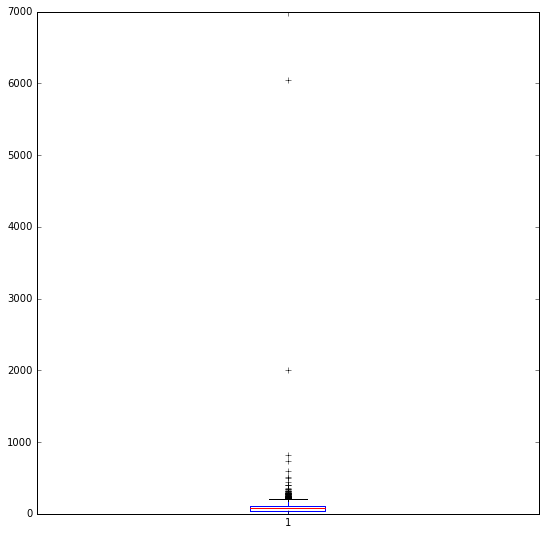

In [165]:
f, ax = plt.subplots(1, figsize=(9, 9))
plt.boxplot(tx.avg_listin, showfliers=True)

(array([ 483.,  109.,  202.,  191.,  197.,  199.,  195.,  198.,  196.,  197.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

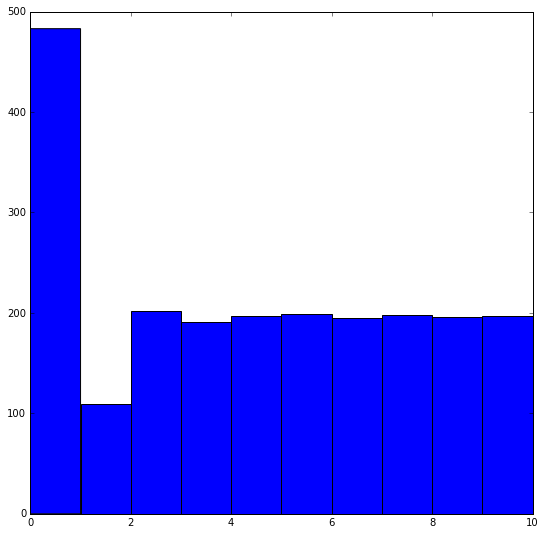

In [141]:
bin_n=10
quantiles = ps.Quantiles(tx.avg_listin,k=bin_n+1)
f, ax = plt.subplots(1, figsize=(9, 9))
plt.hist(quantiles.yb, bins=range(bin_n+1))

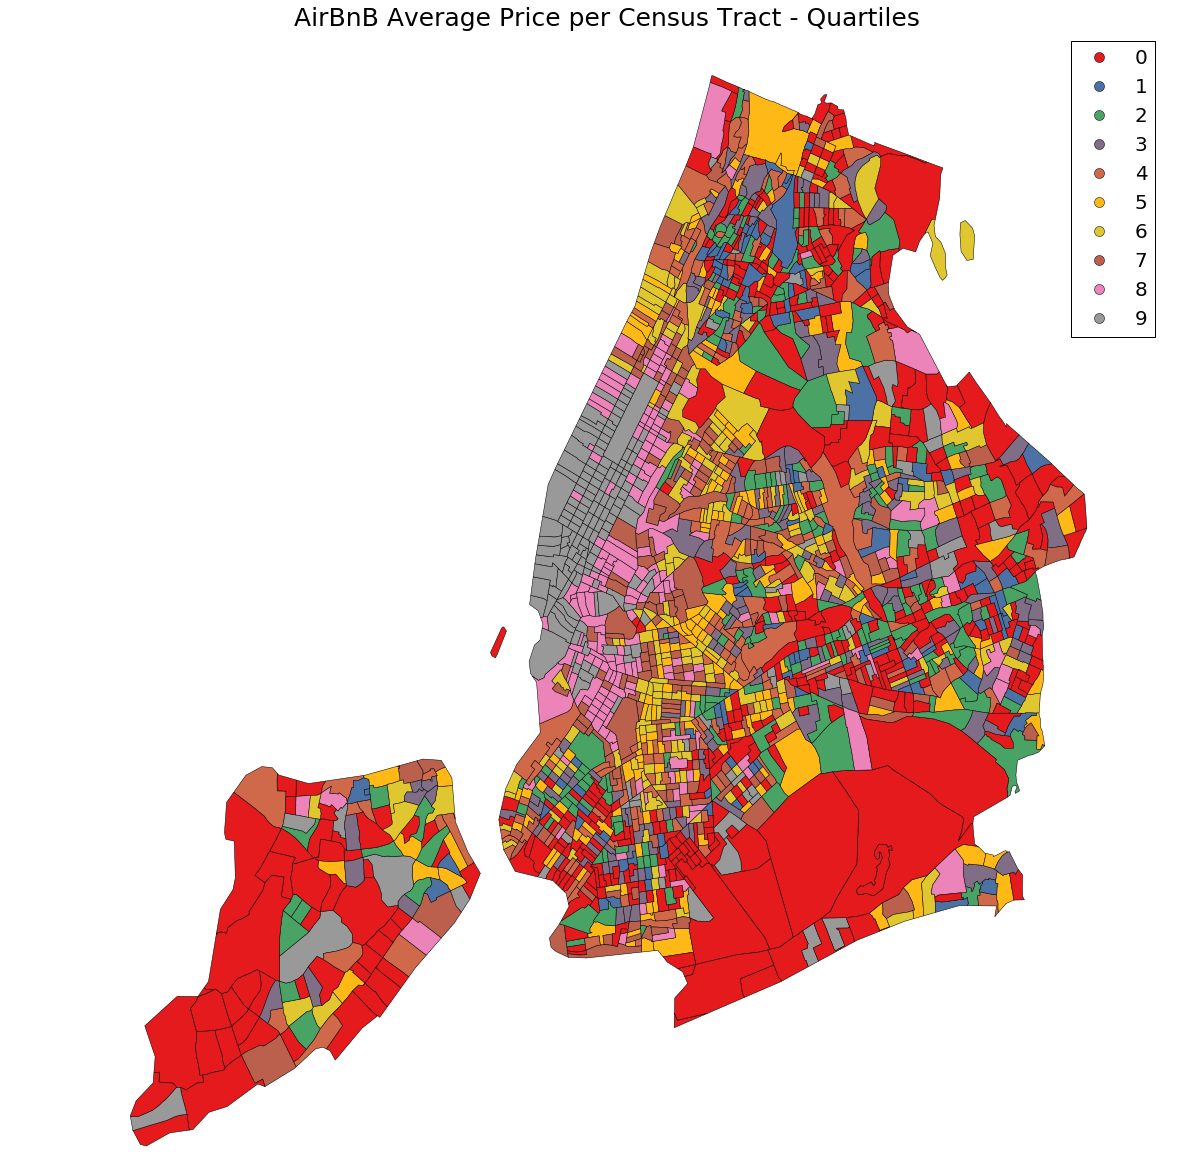

In [142]:
f, ax = plt.subplots(1, figsize=(20, 20))

tx.assign(avg_listin_QT=quantiles.yb).plot(ax=ax, \
                                           linewidth=0.5, \
                                           column='avg_listin_QT', \
                                           categorical=True, legend=True)

plt.title('AirBnB Average Price per Census Tract - Quartiles', fontsize=tfs)
ax.set_axis_off()
plt.show()

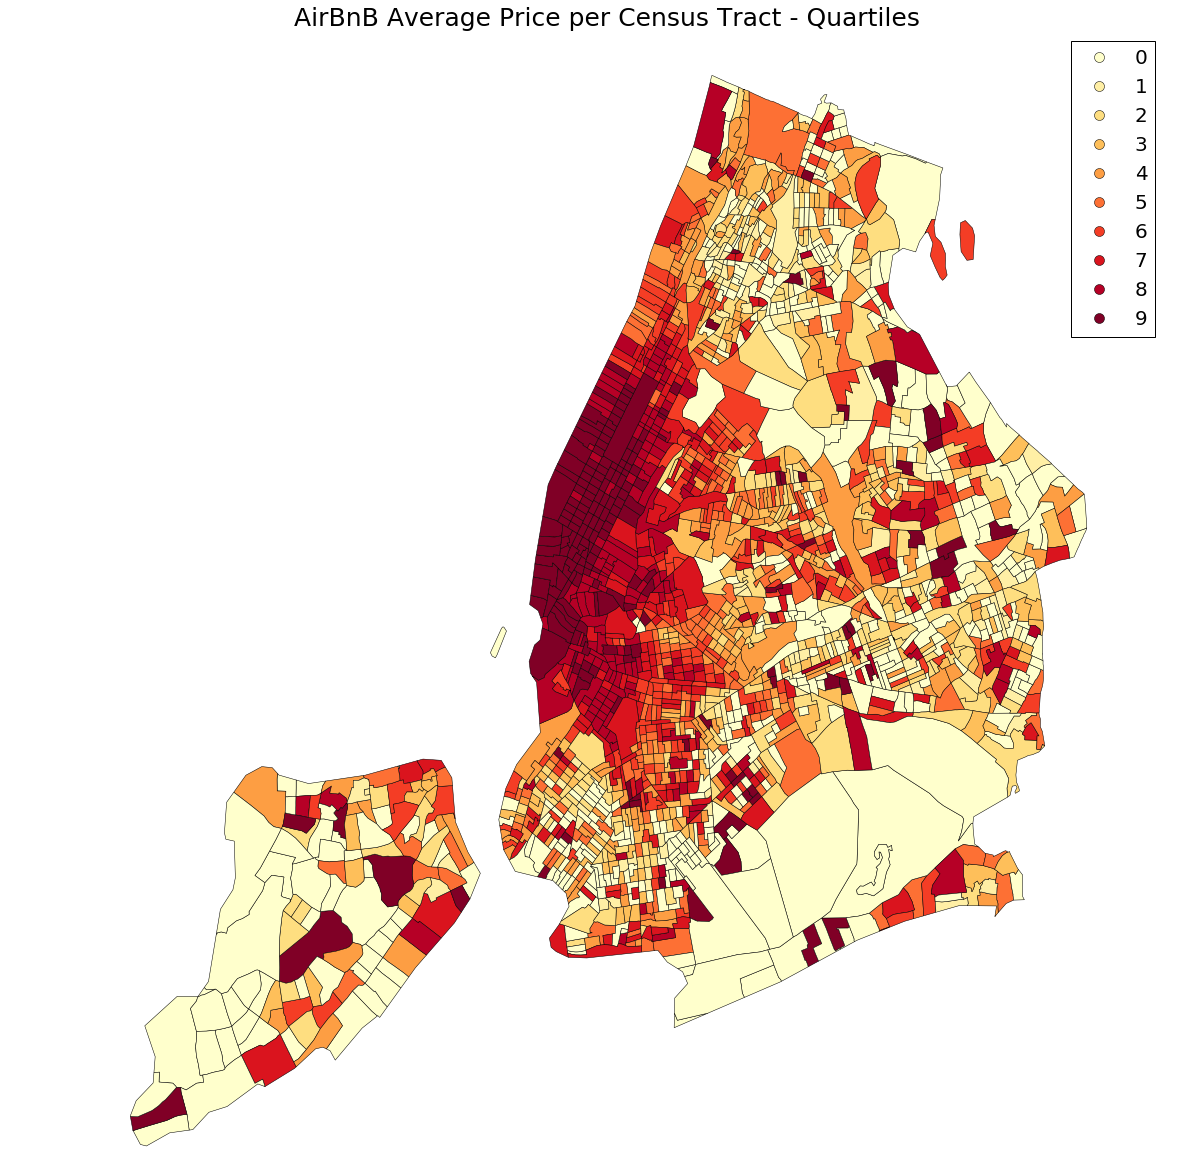

In [143]:
# Color maps can be found at following link:
# https://matplotlib.org/examples/color/colormaps_reference.html

f, ax = plt.subplots(1, figsize=(20, 20))

tx.assign(avg_listin_QT=quantiles.yb).plot(ax=ax, linewidth=0.5, column='avg_listin_QT', \
                                cmap='YlOrRd', categorical=True, legend=True)

plt.title('AirBnB Average Price per Census Tract - Quartiles', fontsize=tfs)
ax.set_axis_off()
plt.show()